## Modeling rain accretion

### Define reference variables

In [111]:
using QuadGK
using SpecialFunctions
using Plots

In [240]:
N=100
L = LinRange(1,100,100)

100-element LinRange{Float64, Int64}:
 1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,…,94.0,95.0,96.0,97.0,98.0,99.0,100.0

In [246]:
[2*L[i] for i in 1:100];

In [277]:
rho_w = 998
rho_a = 1.2
g = 9.81
C_d = 0.55
m_e = 3
r_0 = 1e-3
r_0 = 1e-3
n_0 = 16e6
q_rai = LinRange(1e-8, 5e-3, 100)
q_ice = 1e-6
E_cp = 0.8
v_e = 1/2
a_e = 2
# q_c = LinRange(5e-8, 1, 2)

2

In [278]:
m_0 = 4*pi*rho_w*r_0*r_0*r_0/3
a_0 = pi*r_0*r_0
v_0 = sqrt((8*g*r_0*(rho_w - rho_a))/(3*C_d*rho_a))
lambda_ice = ((gamma(m_e+1)*m_0*n_0)/(q_ice*rho_w*(r_0^m_e)))^(1/(m_e+1));
lambda_rai = [((gamma(m_e+1)*m_0*n_0)/(q*rho_a*(r_0^m_e)))^(1/(m_e+1)) for q in q_c];

In [279]:
accretion = [n_0*a_0*v_0*E_cp*q_rai[i]*gamma(a_e+v_e+1)*((lambda_rai[i])^(-1-a_e-v_e))*(r_0^(-a_e-v_e)) for i in 1:100]

100-element Vector{Float64}:
 2.1903649034619984e-15
 1.9249915520717107e-8
 7.059589779538516e-8
 1.5098148986314536e-7
 2.5892286419084955e-7
 3.9343103526523327e-7
 5.53768282769284e-7
 7.39348965595391e-7
 9.496891823763666e-7
 1.184377726505341e-6
 1.4430578272093669e-6
 1.725414938258237e-6
 2.031168178383794e-6
 ⋮
 8.514800053168897e-5
 8.697124474202864e-5
 8.881250268480499e-5
 9.067174921794077e-5
 9.254895951170143e-5
 9.444410904144577e-5
 9.635717358062077e-5
 9.828812919399137e-5
 0.00010023695223109314
 0.00010220361931989924
 0.00010418810736069286
 0.00010619039352013522

In [280]:
f(r) = [q*exp(-(((gamma(m_e+1)*m_0*n_0)/((q)*rho_w*(r_0^m_e))).^(1/(m_e+1)))*r)*r^(5/2) for q in q_c]
I,err = quadgk(f, 0, Inf, rtol=1e-8)
dq_dt = n_0*a_0*v_0*E_cp*(r_0^(-5/2))*I;

In [284]:
v_t = [v_0*((r_0*lambda_rai[i])^(-v_e))*gamma(v_e+m_e+1)/gamma(m_e+1) for i in 1:100];

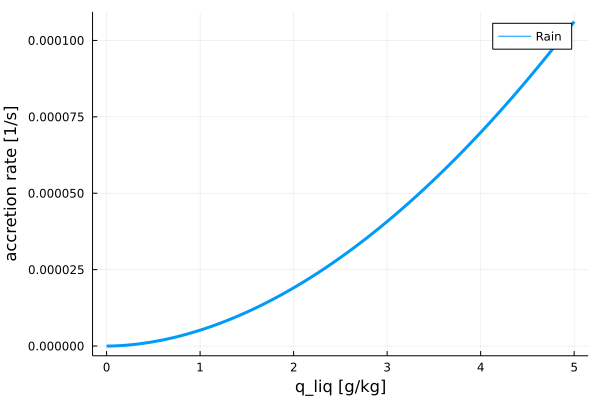

In [285]:
plot(q_c*1e3, accretion, linewidth=3, xlabel="q_liq [g/kg]", ylabel="accretion rate [1/s]", label="Rain")

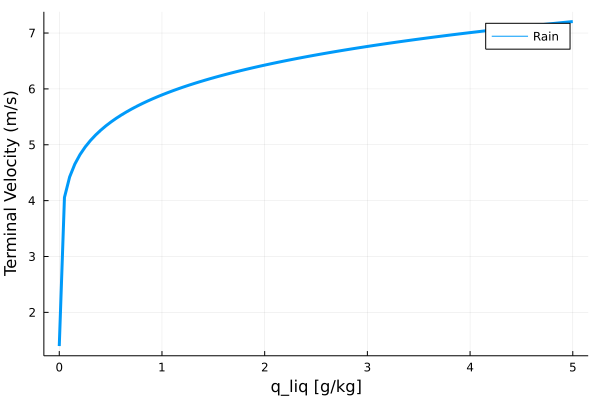

In [286]:
plot(q_c*1e3, v_t[:], linewidth=3, xlabel="q_liq [g/kg]", ylabel="Terminal Velocity (m/s)", label="Rain")